In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy import log, arange, ndarray
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig, show, gca, grid, subplots, tight_layout
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from seaborn import heatmap
from scipy.stats import norm, expon, lognorm
from library.dslabs_functions import (
    plot_bar_chart,
    set_chart_labels,
    get_variable_types,
    plot_multiline_chart
)

#### **Read required datasets**

In [2]:
df_records = pd.read_excel("893_records_with_descriptors_with_names.xlsx")

In [3]:
df_records.head()

,Polymer,Polymer_ID,Polymer_N#C-,Polymer_Benzene,Polymer_C=C-alq,Polymer_Amide,Polymer_carbonate,Polymer_ester,Polymer_halide,Polymer_urethane,...,Solvent_sulfone,Solvent_water,Solvent_carbonate,Solvent_C,Solvent_CH,Sample type,Temperature (K),Time (min),Solvent melting (K),Dissolution
0,PC,3,0,2,0,0,1,0,0,0,...,0,0,0,0,1,waste,298.15,15.0,209.68,YES
1,PC,3,0,2,0,0,1,0,0,0,...,0,0,0,0,1,waste,298.15,20.0,209.68,YES
2,PC,3,0,2,0,0,1,0,0,0,...,0,0,0,0,1,waste,298.15,35.0,209.68,YES
3,PC,3,0,2,0,0,1,0,0,0,...,0,0,0,0,1,waste,298.15,60.0,209.68,YES
4,PC,3,0,2,0,0,1,0,0,0,...,0,0,0,0,1,waste,298.15,120.0,209.68,YES


### Remove identifier variables
The variables `'Polymer'`, `'Polymer_ID'`, `'Solvent'`, and `'Solvent_ID'` are removed from the dataset because they are identifiers.  
Identifiers are not used as features for modeling or analysis, as they don't carry meaningful information about the data itself but only serve to uniquely label records.


In [4]:
df_only_features = df_records.drop(['Polymer', 'Polymer_ID', 'Solvent', 'Solvent_ID'], axis=1)

In [5]:
df_only_features.columns

Index(['Polymer_N#C-', 'Polymer_Benzene', 'Polymer_C=C-alq', 'Polymer_Amide',
       'Polymer_carbonate', 'Polymer_ester', 'Polymer_halide',
       'Polymer_urethane', 'Polymer_CH2', 'Polymer_CH3', 'Polymer_CH',
       'Polymer_C', 'Solvent_halide', 'Solvent_ketone', 'Solvent_ester',
       'Solvent_nitrile', 'Solvent_benzene', 'Solvent_CH2', 'Solvent_Alcohol',
       'Solvent_sulfoxide', 'Solvent_carboxylic_acid', 'Solvent_amide',
       'Solvent_CH3', 'Solvent_ether', 'Solvent_C=C-alq', 'Solvent_pyridine',
       'Solvent_sulfone', 'Solvent_water', 'Solvent_carbonate', 'Solvent_C',
       'Solvent_CH', 'Sample type', 'Temperature (K)', 'Time (min)',
       'Solvent melting (K)', 'Dissolution'],
      dtype='object')

### Distribution: Plot polymer distribution
This code counts the number of records for each polymer in the dataset using the `Polymer` column.

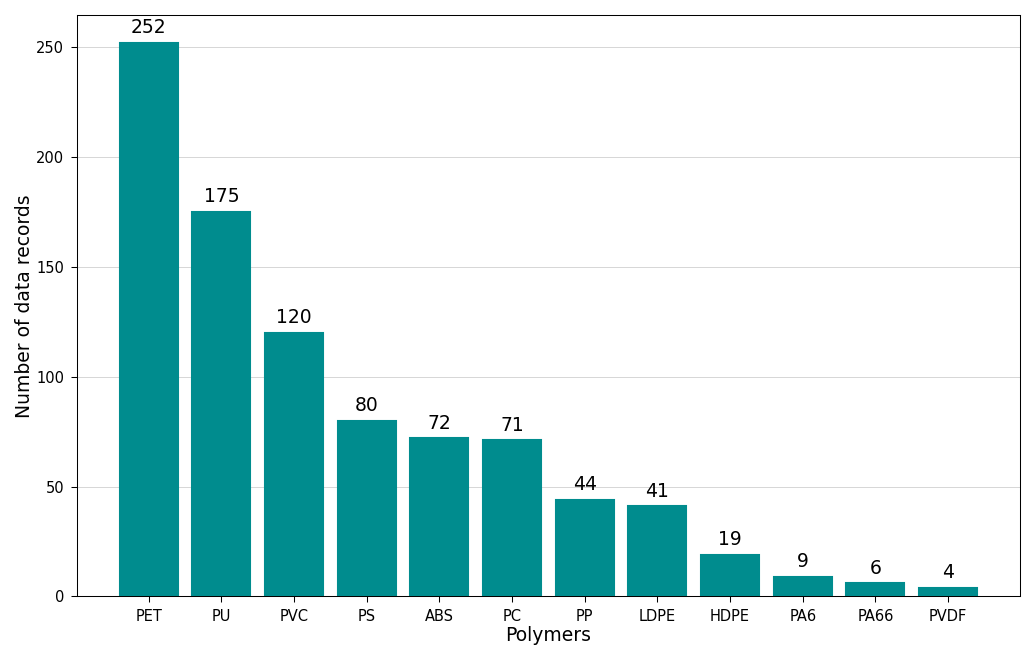

In [6]:

# Count how many records there are for each polymer
polymer_counts = df_records["Polymer"].value_counts()

polymer_counts_sorted = polymer_counts.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(7, 4.5))
bars = ax.bar(
    polymer_counts_sorted.index,
    polymer_counts_sorted.values,
    color='#008c8e',
    edgecolor='#008c8e',
    zorder=3
)

ax.set_xlabel("Polymers", fontsize=9)
ax.set_ylabel("Number of data records", fontsize=9)

for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_visible(True)

ax.tick_params(width=0.5, labelsize=7, direction="out")

ax.grid(axis='y', color='gray', linestyle='-', linewidth=0.3, alpha=0.5, zorder=0)

ymax = polymer_counts_sorted.max()
offset = 0.01 * ymax
for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + offset,
        str(int(h)),
        ha='center', va='bottom',
        fontsize=9,
        color="black"
    )

plt.tight_layout()
plt.savefig("images/polymer_counts.png", bbox_inches="tight")
plt.show()



### Plot target class distribution
This code counts and plots the distribution of the target variable `'Dissolution'`, 
showing how many records belong to each class.

Dissolution
NO     509
YES    384
Name: count, dtype: int64


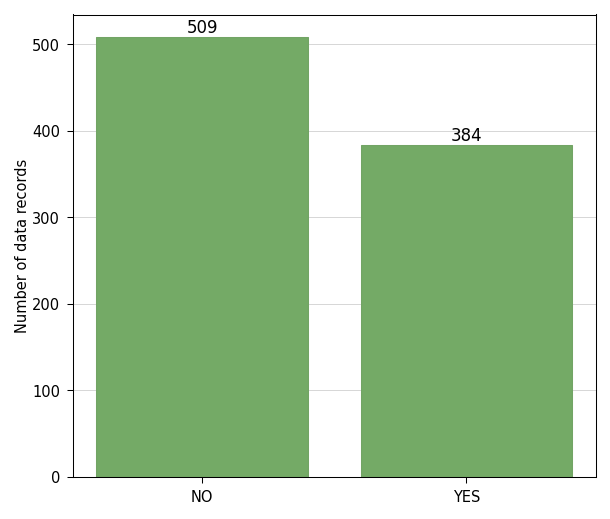

In [ ]:

target = "Dissolution"

# Count occurrences of each class
values: Series = df_only_features[target].value_counts()
print(values)

figure(figsize=(4.5, 4))

plot_bar_chart(values.index.to_list(), values.to_list(), title="")

ax = gca()
ax.set_ylabel("Number of data records", fontsize=7)

for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_visible(True)

ax.tick_params(width=0.5, labelsize=7, direction="out")

ax.grid(axis='y', color='gray', linestyle='-', linewidth=0.3, alpha=0.5, zorder=0)

savefig("images/class_distribution.png", bbox_inches='tight')
show()



### Bar chart for Sample Type distribution
This code generates a bar chart showing the number of occurrences for each category 
of the `Sample type` variable.

Sample type
fiber     445
film      295
waste      87
pellet     59
powder      7
Name: count, dtype: int64


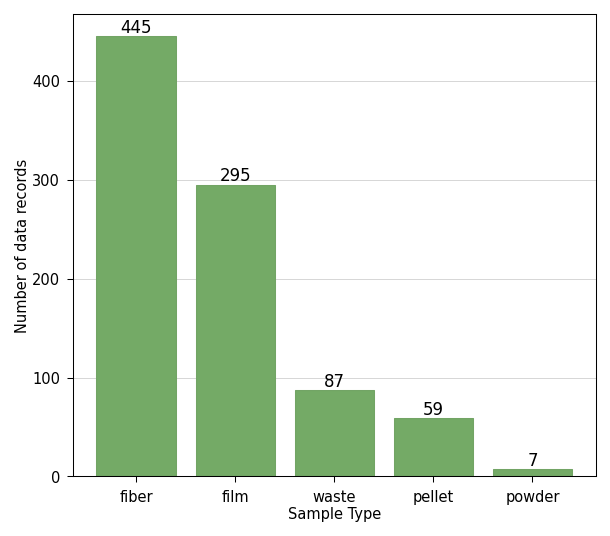

In [ ]:
variable = "Sample type"

# Count occurrences of each category
values: Series = df_only_features[variable].value_counts()
print(values)
figure(figsize=(4.5, 4))


plot_bar_chart(values.index.to_list(), values.to_list(), title="")

ax = gca()
ax.set_xlabel("Sample Type", fontsize=7)  
ax.set_ylabel("Number of data records", fontsize=7) 

for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_visible(True)

ax.tick_params(width=0.5, labelsize=7, direction="out")

ax.grid(axis='y', color='gray', linestyle='-', linewidth=0.3, alpha=0.5, zorder=0)

savefig("images/sample_type_distribution.png", bbox_inches='tight')
show()


### Plot variable types distribution
This code counts and plots the distribution of variable types: Numeric, Binary, and Symbolic.

Numeric variables: ['Polymer_N#C-', 'Polymer_Benzene', 'Polymer_C=C-alq', 'Polymer_Amide', 'Polymer_carbonate', 'Polymer_ester', 'Polymer_halide', 'Polymer_urethane', 'Polymer_CH2', 'Polymer_CH3', 'Polymer_CH', 'Polymer_C', 'Solvent_halide', 'Solvent_ketone', 'Solvent_ester', 'Solvent_nitrile', 'Solvent_benzene', 'Solvent_CH2', 'Solvent_Alcohol', 'Solvent_sulfoxide', 'Solvent_carboxylic_acid', 'Solvent_amide', 'Solvent_CH3', 'Solvent_ether', 'Solvent_C=C-alq', 'Solvent_pyridine', 'Solvent_sulfone', 'Solvent_water', 'Solvent_carbonate', 'Solvent_C', 'Solvent_CH', 'Temperature (K)', 'Time (min)', 'Solvent melting (K)']
Binary variables: ['Polymer_N#C-', 'Polymer_C=C-alq', 'Polymer_carbonate', 'Polymer_ester', 'Polymer_urethane', 'Polymer_C', 'Solvent_ketone', 'Solvent_nitrile', 'Solvent_sulfoxide', 'Solvent_carboxylic_acid', 'Solvent_amide', 'Solvent_pyridine', 'Solvent_sulfone', 'Solvent_water', 'Solvent_carbonate']
Symbolic variables: ['Sample type', 'Dissolution']


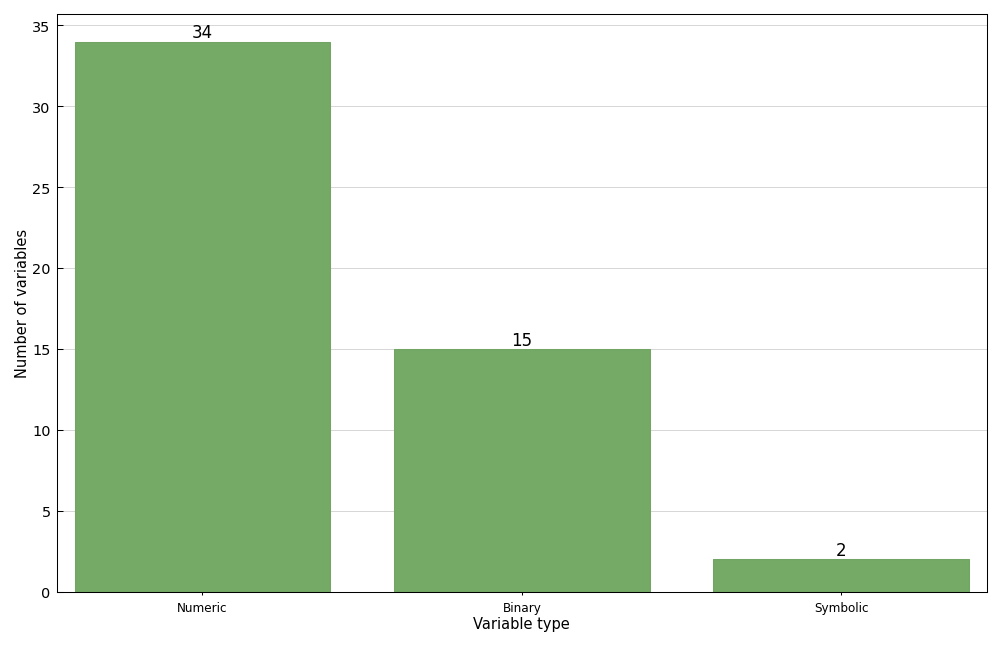

In [ ]:
figure(figsize=(8, 5))

# Identify numeric variables (int or float)
numeric = [var for var in df_only_features.columns if df_only_features[var].dtype in ['int64', 'float64']]

# Identify binary variables (two unique values, not object type)
binary = [var for var in df_only_features.columns if df_only_features[var].nunique() == 2 and df_only_features[var].dtype != 'object']

# Identify symbolic variables (categorical/object type)
symbolic = [var for var in df_only_features.columns if df_only_features[var].dtype == 'object']

print("Numeric variables:", numeric)
print("Binary variables:", binary)
print("Symbolic variables:", symbolic)

# Count each type of variable
counts = {
    "Numeric": len(numeric),
    "Binary": len(binary),
    "Symbolic": len(symbolic)
}
plot_bar_chart(
    list(counts.keys()),
    list(counts.values()),
    title=""
)

ax = gca()

ax.set_xlabel("Variable type", fontsize=7)
ax.set_ylabel("Number of variables", fontsize=7)

for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_visible(True)

ax.tick_params(width=0.5)
grid(color='gray', linestyle='-', linewidth=0.3, alpha=0.5, axis='y')

ax.margins(x=0.02)  
savefig("images/var_types.png", bbox_inches='tight')
show()



### Generate statistical summary
This code generates a complete statistical summary of the dataset.

In [9]:
pd.set_option("display.max_columns", None)
# Generate statistical summary of the dataset
# include="all" ensures that both numeric and categorical columns are summarized
summary5 = df_only_features.describe(include="all")
summary5

,Polymer_N#C-,Polymer_Benzene,Polymer_C=C-alq,Polymer_Amide,Polymer_carbonate,Polymer_ester,Polymer_halide,Polymer_urethane,Polymer_CH2,Polymer_CH3,Polymer_CH,Polymer_C,Solvent_halide,Solvent_ketone,Solvent_ester,Solvent_nitrile,Solvent_benzene,Solvent_CH2,Solvent_Alcohol,Solvent_sulfoxide,Solvent_carboxylic_acid,Solvent_amide,Solvent_CH3,Solvent_ether,Solvent_C=C-alq,Solvent_pyridine,Solvent_sulfone,Solvent_water,Solvent_carbonate,Solvent_C,Solvent_CH,Sample type,Temperature (K),Time (min),Solvent melting (K),Dissolution
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.00000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.00000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893,893.000000,893.000000,893.000000,893
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fiber,NaN,NaN,NaN,NO
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,445,NaN,NaN,NaN,509
mean,0.080627,1.003359,0.080627,0.023516,0.079507,0.56439,0.143337,0.391937,2.165733,0.254199,0.434490,0.083987,0.087346,0.215006,0.089586,0.005599,0.06495,1.765957,0.091825,0.057111,0.111982,0.171333,1.238522,0.238522,0.131019,0.003359,0.003359,0.002240,0.002240,0.209406,0.478163,NaN,335.403080,75.419914,234.172857,NaN
std,0.272414,0.740402,0.272414,0.190898,0.270680,0.90064,0.363177,0.794334,1.605579,0.590752,0.638294,0.277523,0.430334,0.411056,0.289644,0.074659,0.25108,2.015101,0.373551,0.232184,0.315521,0.377010,1.188602,0.615745,0.448804,0.057896,0.057896,0.047298,0.047298,0.619056,0.946331,NaN,37.527341,293.135845,45.479131,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,293.150000,1.000000,133.150000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,298.150000,15.000000,202.350000,NaN
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,333.150000,30.000000,242.150000,NaN
75%,0.000000,2.000000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,363.150000,60.000000,263.600000,NaN


### Boxplots of selected continuous variables
This code generates individual boxplots for the selected continuous variables 
(`Time (min)`, `Temperature (K)`, and `Solvent melting (K)`).

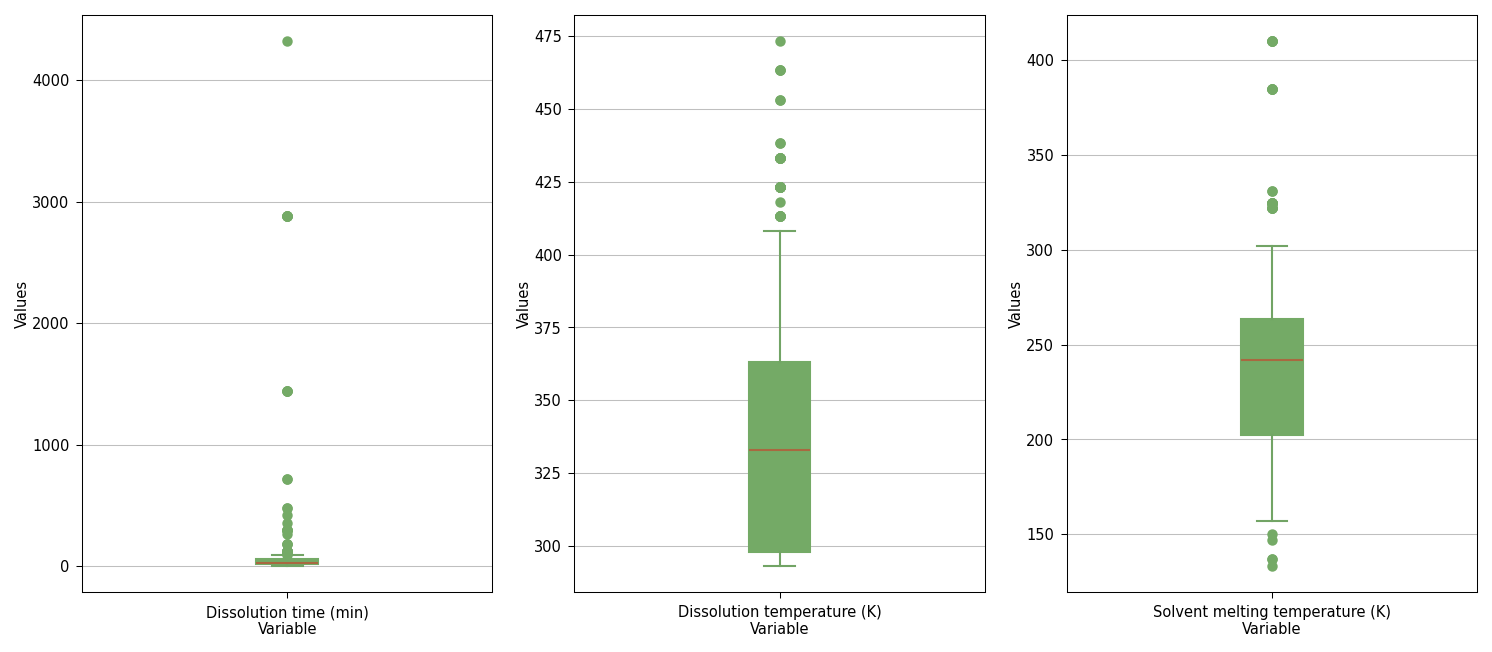

In [10]:
vars_to_plot = ["Time (min)", "Temperature (K)", "Solvent melting (K)"]

xtick_labels = [
    "Dissolution time (min)",
    "Dissolution temperature (K)",
    "Solvent melting temperature (K)"
]
fig: Figure
axs: ndarray
fig, axs = subplots(1, len(vars_to_plot), figsize=(len(vars_to_plot) * 4, 5), squeeze=False)

for j, var in enumerate(vars_to_plot):
    ax = axs[0, j]
    ax.boxplot(df_only_features[var].dropna().values)

    ax.set_xticks([1])
    ax.set_xticklabels([xtick_labels[j]], fontsize=11)

    ax.set_xlabel("Variable", fontsize=7)
    ax.set_ylabel("Values", fontsize=7)

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
        spine.set_visible(True)   

    ax.tick_params(width=0.5, labelsize=7, direction="out")

    ax.grid(color='gray', linestyle='-', linewidth=0.5, axis='y', alpha=0.5)

savefig("images/time_temp_melting_boxplots_labeled.png", bbox_inches="tight")
show()


### Histograms of selected continuous variables
This code generates histograms for the variables `Time (min)`, `Temperature (K)`, and `Solvent melting (K)`.


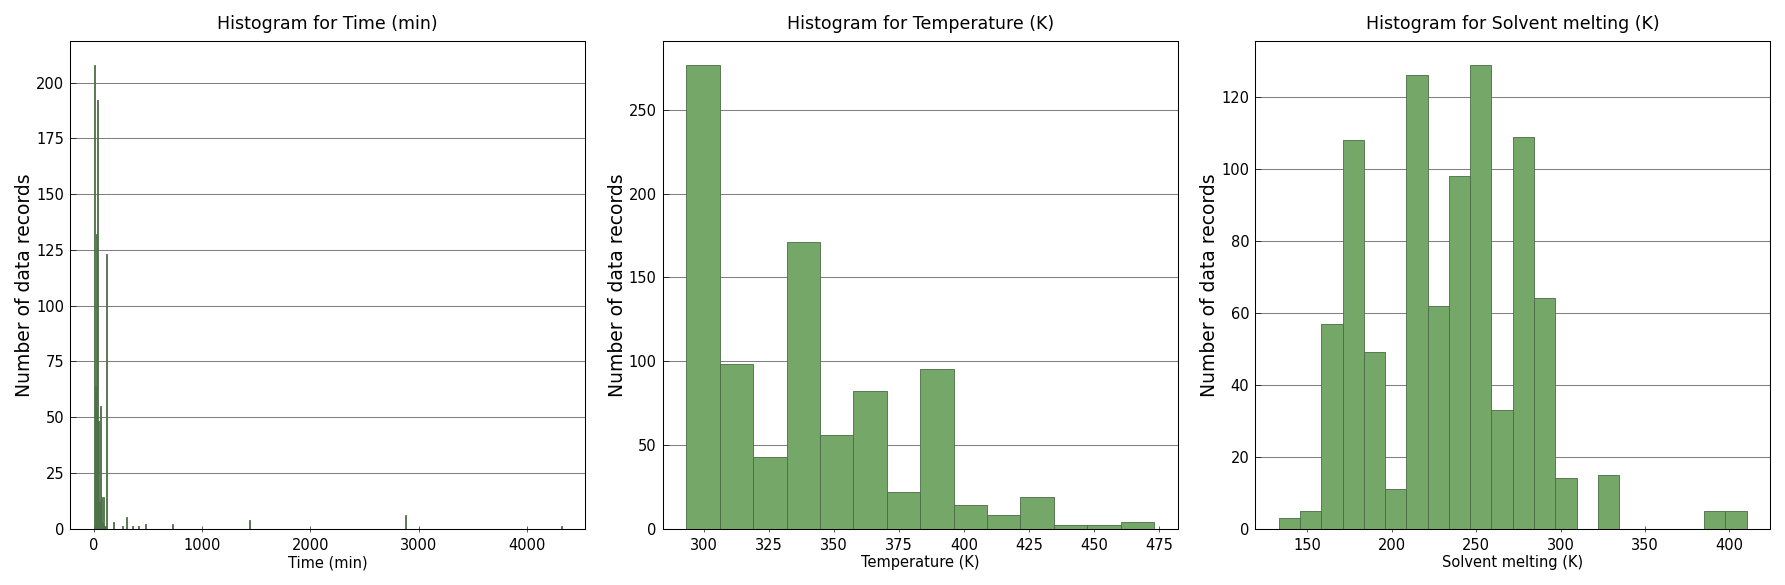

In [11]:
# Specific variables to include
selected_vars = ["Time (min)", "Temperature (K)", "Solvent melting (K)"]

selected_vars = [var for var in selected_vars if var in df_only_features.columns]

if selected_vars:
    rows, cols = 1, len(selected_vars)

    fig: Figure
    axs: ndarray
    fig, axs = subplots(rows, cols, figsize=(cols * 4, rows * 4), squeeze=False)

    i, j = 0, 0
    for var in selected_vars:
        ax = axs[i, j]

        set_chart_labels(
            ax,
            title=f"Histogram for {var}",
            xlabel=var,
            ylabel="Number of data records",
        )
        ax.set_xlabel(var, fontsize=7)
        ax.set_ylabel("Number of data records", fontsize=9)

        ax.hist(
            df_only_features[var].dropna().values,
            bins="auto",
            color="#75a868",           
            edgecolor="#4b6b46", 
            linewidth = 0.4,      
            alpha=1
        )

        for spine in ax.spines.values():
            spine.set_linewidth(0.5)
            spine.set_visible(True)

        ax.tick_params(width=0.3, labelsize=7)

        ax.grid(color='gray', linestyle='-', linewidth=0.5, axis='y')

        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)

    fig.tight_layout()

    savefig("images/selected_histograms.png", bbox_inches='tight')
    show()
else:
    print("None of the selected variables are available in the dataframe.")


### Filter and plot histogram for a selected variable within a specific range
This code filters the desired variable to include only values within a defined range.


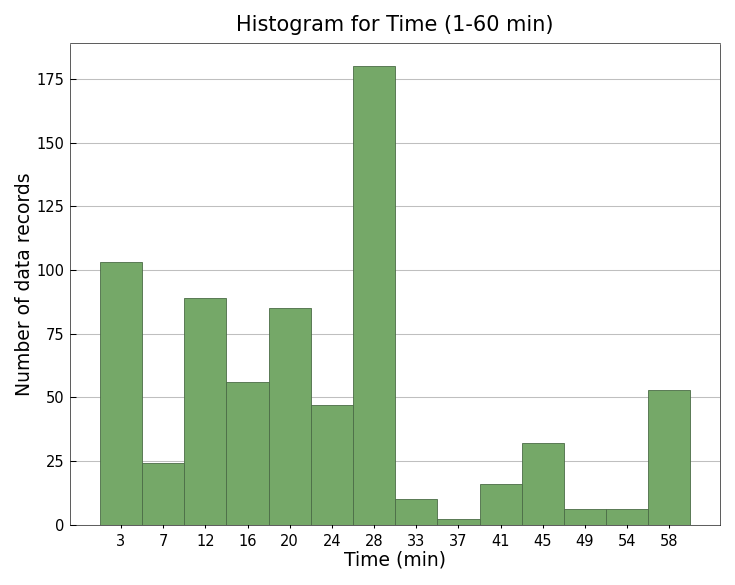

In [12]:
# Filter data for Time (min) between 1 and 60
time_data = df_only_features["Time (min)"].dropna()
time_data = time_data[(time_data >= 1) & (time_data <= 60)]

if not time_data.empty:
    fig, ax = subplots(figsize=(5, 4))
    counts, bins, patches = ax.hist(
        time_data,
        bins="auto",
        color="#75a868",        
        edgecolor="#4b6b46",    
        linewidth=0.4,          
        alpha=1
    )

    ax.set_title("Histogram for Time (1-60 min)", fontsize=10)
    ax.set_xlabel("Time (min)", fontsize=9)
    ax.set_ylabel("Number of data records", fontsize=9)

    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    ax.set_xticks(bin_centers)   
    ax.set_xticklabels([int(round(x)) for x in bin_centers], fontsize=7)  

    ax.tick_params(width=0.5, labelsize=7)
    ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5, axis='y')

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.3)

    fig.tight_layout()
    savefig("images/histogram_time_1_to_60.png", bbox_inches='tight')
    show()
else:
    print("No data available between 1 and 60 minutes.")


### Histogram and distribution fitting for selected variables
This code plots histograms for the selected variables and overlays the fitted probability distributions 
(Normal, Exponential, and Log-Normal) for comparison.


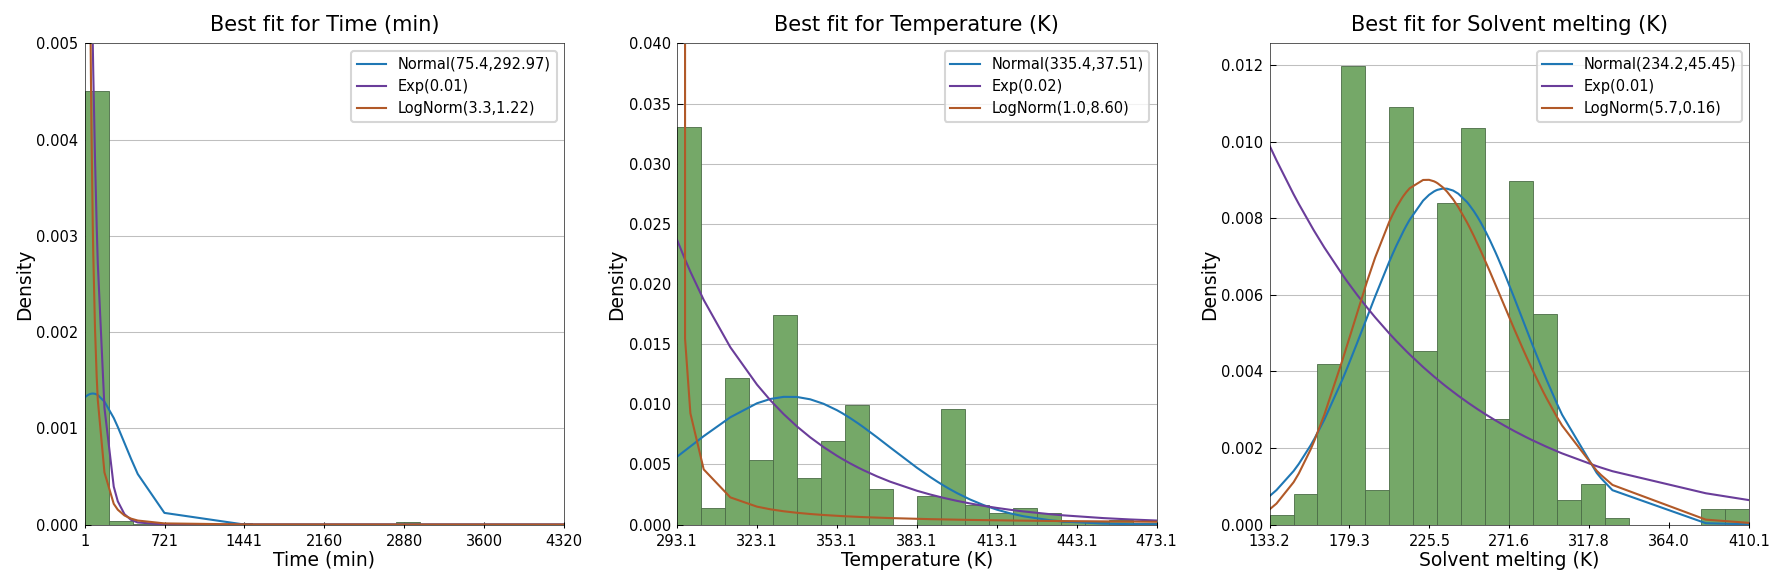

In [13]:
# Function to compute known distributions for a given set of values
def compute_known_distributions(x_values: list) -> dict:
    distributions = {}

    # Gaussian (Normal)
    mean, sigma = norm.fit(x_values)
    distributions[f"Normal({mean:.1f},{sigma:.2f})"] = {
        "y": norm.pdf(x_values, mean, sigma),
        "color": "#1f77b4"  
    }

    # Exponential
    loc, scale = expon.fit(x_values)
    distributions[f"Exp({1/scale:.2f})"] = {
        "y": expon.pdf(x_values, loc, scale),
        "color": "#6a3d9a"  
    }

    # Log-Normal
    sigma, loc, scale = lognorm.fit(x_values)
    distributions[f"LogNorm({log(scale):.1f},{sigma:.2f})"] = {
        "y": lognorm.pdf(x_values, sigma, loc, scale),
        "color": "#b15928"  
    }

    return distributions

# Function to plot histogram and distributions
def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values = series.sort_values().to_list()

    ax.hist(
        values,
        bins=20,
        density=True,
        color="#75a868",
        edgecolor="#4b6b46",
        linewidth=0.4,
        alpha=1
    )

    distributions = compute_known_distributions(values)
    for label, data in distributions.items():
        ax.plot(values, data["y"], label=label, color=data["color"], linewidth=1)

    ax.set_title(f"Best fit for {var}", fontsize=10)
    ax.set_xlabel(var, fontsize=9)
    ax.set_ylabel("Density", fontsize=9)

    min_val, max_val = min(values), max(values)
    step = (max_val - min_val) / 6
    ax.set_xticks(arange(min_val, max_val + step, step))
    ax.set_xlim(min_val, max_val)

    if var == "Temperature (K)":
        ax.set_ylim(0, 0.040)

    if var == "Time (min)":
        ax.set_ylim(0, 0.005)

    for spine in ax.spines.values():
        spine.set_linewidth(0.3)
        spine.set_visible(True)

    ax.tick_params(width=0.5, labelsize=7)
    ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5, axis='y')
    ax.legend(fontsize=7)

# --- Main execution: only for selected variables ---
selected_vars = ["Time (min)", "Temperature (K)", "Solvent melting (K)"]
selected_vars = [var for var in selected_vars if var in df_only_features.columns]

if selected_vars:
    rows, cols = 1, len(selected_vars)
    fig, axs = subplots(rows, cols, figsize=(cols * 4, rows * 4), squeeze=False)

    i, j = 0, 0
    for var in selected_vars:
        histogram_with_distributions(axs[i, j], df_only_features[var].dropna(), var)
        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)

    fig.tight_layout()
    savefig("images/selected_histogram_with_distributions_clean.png", bbox_inches='tight')
    show()
else:
    print("None of the selected variables are available in the dataframe.")


#### **Dimensionality: Visualize the proportion between the number of records and variables**

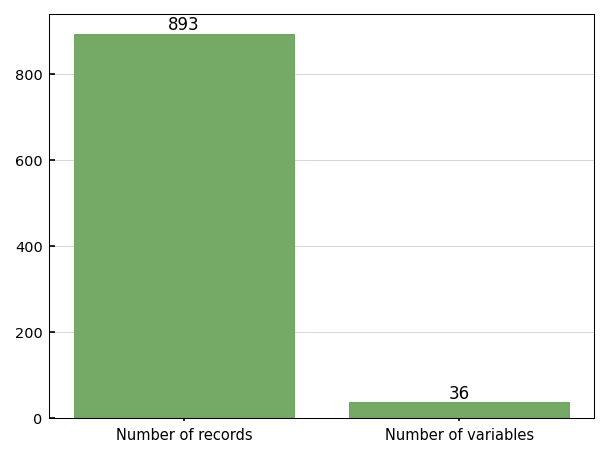

In [ ]:
figure(figsize=(4, 3))

values: dict[str, int] = {"Number of records": df_only_features.shape[0], "Number of variables": df_only_features.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title=""
)
ax = gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)   
    spine.set_visible(True)

ax.tick_params(axis='x', labelsize=7)
ax.grid(True, linestyle='-', linewidth=0.3, color='gray', axis='y', alpha=0.5)
tight_layout(pad=0.5)
savefig(f"images/records_variables.png", bbox_inches="tight")
show()


### Sparsity: Correlation Analysis Heatmap
This code computes and visualizes the absolute correlation matrix between numeric and binary variables, 
including the target variable `Dissolution`.


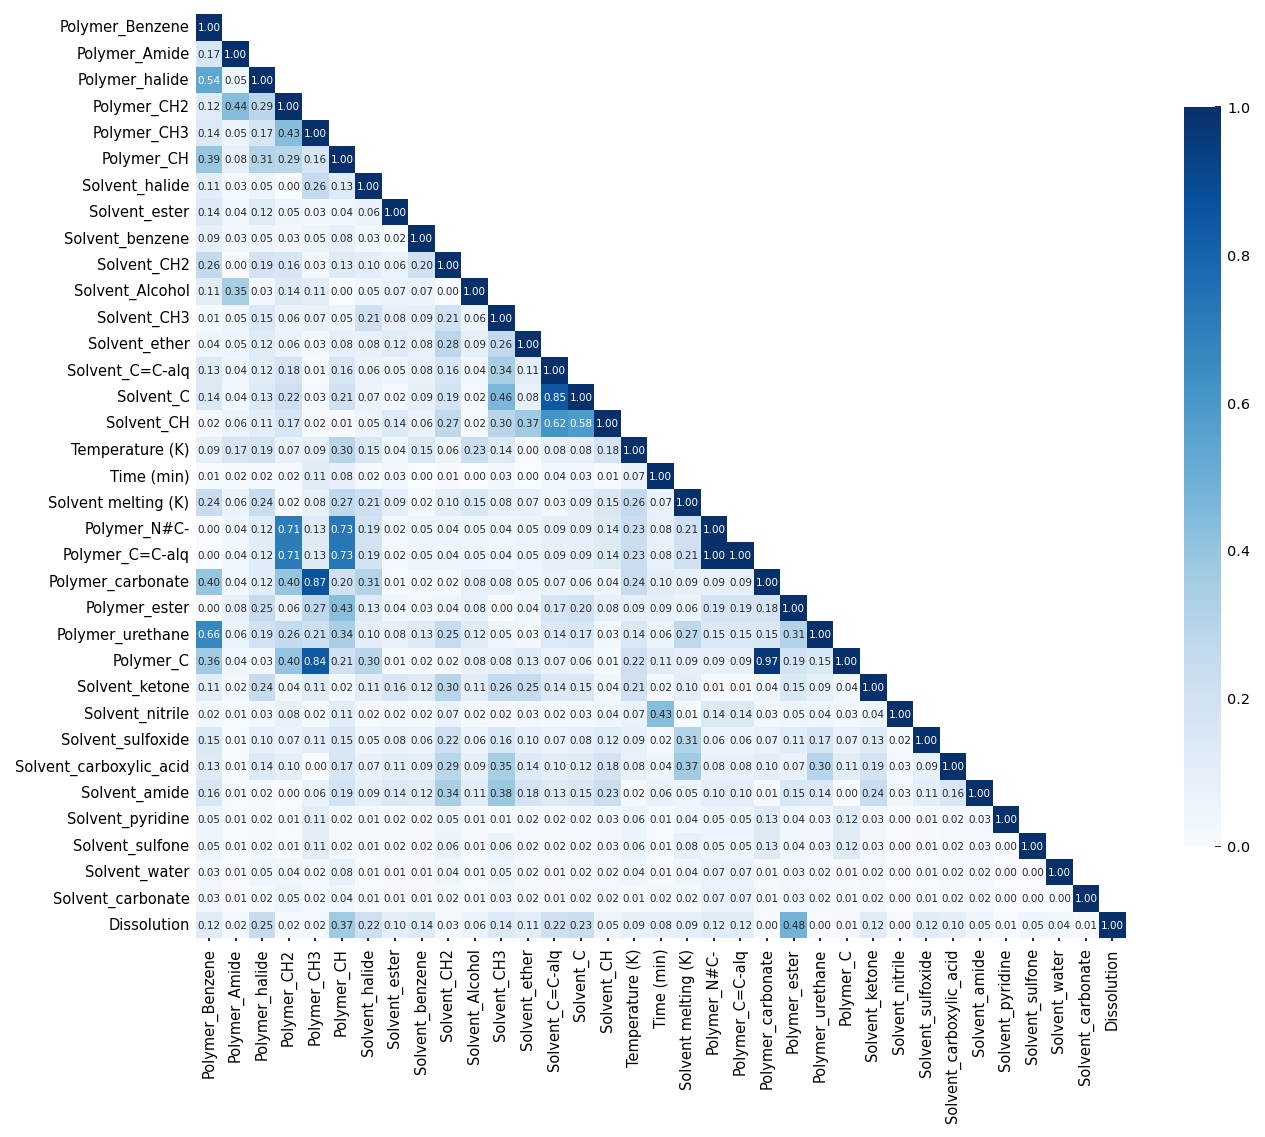

In [15]:
# --- Identify variable types ---
# Get the types of variables in the dataset
variables_types: dict[str, list] = get_variable_types(df_only_features)
numeric: list[str] = variables_types["Numeric"]
binary: list[str] = variables_types["Binary"]

# Combine numeric and binary variables
selected_vars: list[str] = numeric + binary

# --- Convert 'Dissolution' column to numeric (YES = 1, NO = 0) ---
# This step is required because correlation only works with numeric data
if "Dissolution" in df_only_features.columns:
    df_only_features["Dissolution"] = df_only_features["Dissolution"].map({"YES": 1, "NO": 0})

if "Dissolution" not in selected_vars and "Dissolution" in df_only_features.columns:
    selected_vars.append("Dissolution")

# --- Compute absolute Pearson correlation matrix ---
# Pearson is the default method for .corr(), but we specify it explicitly for clarity
corr_mtx: DataFrame = df_only_features[selected_vars].corr(method="pearson").abs()

mask = np.triu(np.ones_like(corr_mtx, dtype=bool), k=1)

figure(figsize=(10, 8))
heatmap(
    corr_mtx,
    mask=mask,                     
    xticklabels=selected_vars,     
    yticklabels=selected_vars,     
    annot=True,                     
    fmt=".2f",                       
    cmap="Blues",                    
    vmin=0, vmax=1,                  
    annot_kws={"size": 5},           
    cbar_kws={"shrink": 0.8},        
    linewidths=0,
    linecolor="white"
)

ax = gca()
ax.tick_params(axis='x', labelrotation=90, labelsize=7)  
ax.tick_params(axis='y', labelsize=7)                     

ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

savefig(f"images/correlation_analysis.png", bbox_inches='tight')
show()
